In [1]:
from random import uniform
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.utils import check_random_state
from sklearn.utils import shuffle as util_shuffle
from sklearn.neural_network import MLPClassifier

# A. Function to Generate two half moon

In [2]:
def make_moons1(n_samples=100, shuffle=True, noise=None, random_state=None,spacing=0.5):
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    generator = check_random_state(random_state)

    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out))
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out))
    inner_circ_x = 1 - np.cos(np.linspace(0, np.pi, n_samples_in))
    inner_circ_y = 1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - spacing

    X = np.vstack([np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y)]).T
    y = np.hstack([np.zeros(n_samples_out, dtype=np.intp),
                   np.ones(n_samples_in, dtype=np.intp)])

    if shuffle:
        X, y = util_shuffle(X, y, random_state=generator)

    if noise is not None:
        X += generator.normal(scale=noise, size=X.shape)

    return X, y

# B. Scoring function

In [3]:
def micro_scoring():
    pr=precision_score(y_test, predicted, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted, average='micro') 
    print ('\n F-measure:'+str(fm))
    return();            
    
def macro_scoring():
    pr=precision_score(y_test, predicted, average='macro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted, average='macro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted, average='macro') 
    print ('\n F-measure:'+str(fm))
    return();
def evolution():
    print ('\n Confusion Matrix \n')
    print (confusion_matrix(y_test,predicted))
    choice =-1
    print("Choose a Scoring technique")
    choice="1"
    #choice=input("1. Micro Scoring   2. Macro Scoring: ")
    if choice=="1":
        micro_scoring()
    elif choice=="2":
        macro_scoring()


# C. Function to plot MLP Decision Boundary

In [4]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')
    return plt

# D. Take the number of data point and noise of the data sets from the user

In [5]:
n = input("Enter no of points: ")
noise = input("Enter the level of noise: ")

Enter no of points: 4000
Enter the level of noise: 0.1



# 1. Dataset 1 (Noise=0.1 and spacing=0.5(default)

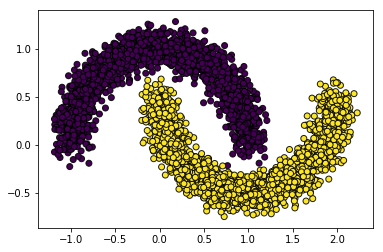

In [6]:
X, y = make_moons1(n_samples=int(n), noise=float(noise),random_state=0)
plt.scatter(X[:,0],X[:,1],c=y,alpha=30,edgecolor='black')
plt.savefig('Half_moon_data1.png')

# 1.1 Selecting 10% datasets as test data from the region( -0.3<=y<=0.5)

In [7]:
x_test=[]
x_test=X[(X[:,1]>=-0.3) & (X[:,1]<=0.5)]


temp=((X[:,1]>=-0.3) & (X[:,1]<=0.5))

y_test=y[np.where(temp==True)]


# taking 10% data from the region

x_test=x_test[:int(int(n)*.1)]
y_test=y_test[:int(int(n)*.1)]

# 1.2 Taking rest 10% data randomly from the dataset

In [8]:
# taking rest 10% data randomly from the dataset
while(len(x_test)<int(int(n)*.2)):
    p=X[np.random.choice(X.shape[0], 1, replace=False), :]
    m=np.where(X==p)
    if(p not in x_test):
        x_test=np.append(x_test,p,axis=0)
        y_test=np.append(y_test,y[int(m[0][0])])
    else:
        continue
    

#  1.3 splits 80% data as training data other than test data

In [9]:
x_train=[]
y_train=[]
for i in X:
    if(i not in x_test):
        x_train.append(i)
        y_train.append(y[np.where(X==i)[0][0]])

x_train=np.array(x_train)
y_train=np.array(y_train)

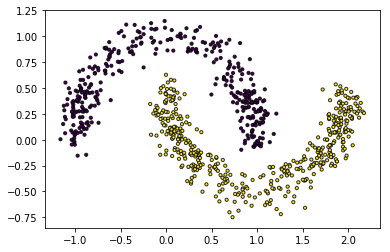

In [10]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=10,alpha=50,edgecolor='black')
plt.savefig('half_moon_test_data1.png')

# 1.4 Train the model using support vector Machine

In [11]:
list_C = np.arange(1,10,1)
clf_svm = svm.SVC(gamma='auto')
parameters = {
            'C':list_C,
            'kernel':['rbf','poly','sigmoid'],
            'gamma':['auto','scale'],
            'decision_function_shape':['ovo', 'ovr']
            }
gs_clf_svm=GridSearchCV(clf_svm,parameters,cv=10)
gs_clf_svm.fit(x_train,y_train)
gs_clf_svm_b=gs_clf_svm.best_estimator_
print (gs_clf_svm_b)
predicted = gs_clf_svm_b.predict(x_test)
predicted = list(predicted)
evolution()

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 Confusion Matrix 

[[362   0]
 [  0 438]]
Choose a Scoring technique

 Precision:1.0

 Recall:1.0

 F-measure:1.0


# 1.5 ploting the Decision Boundary of support vector Machine

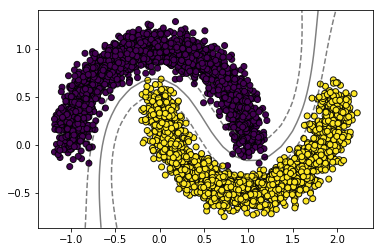

In [12]:
ax = None
    
    
plt.scatter(X[:,0],X[:,1],c=y,alpha=30,edgecolor='black')
if ax is None:
    ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
# create grid to evaluate model
x1 = np.linspace(xlim[0], xlim[1], 30)
y1 = np.linspace(ylim[0], ylim[1], 30)
Y1, X1 = np.meshgrid(y1,x1)
xy = np.vstack([X1.ravel(), Y1.ravel()]).T
P = gs_clf_svm_b.decision_function(xy).reshape(X1.shape)
    
# plot decision boundary and margins
ax.contour(X1, Y1, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
plt.savefig('HM_SVM_DB1.png')

# 1.6 Train training data using Multilayer perceptron classifier

In [13]:
clf_mlp = MLPClassifier()
parameters = {
            'hidden_layer_sizes':[(20),(15,20),(10,10,10)],
            'activation':['tanh','relu','identity','logistic'],
            'max_iter':[1000,2000],
            'solver':['lbfgs', 'sgd', 'adam'],
            }
gs_clf_mlp=GridSearchCV(clf_mlp,parameters,cv=10)
gs_clf_mlp.fit(x_train,y_train)
gs_clf_mlp_b=gs_clf_mlp.best_estimator_
print (gs_clf_mlp_b)
predicted = gs_clf_mlp_b.predict(x_test)
predicted = list(predicted)


/home/sysadm/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/sysadm/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/sysadm/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)



 Confusion Matrix 

[[362   0]
 [  0 438]]
Choose a Scoring technique

 Precision:1.0

 Recall:1.0

 F-measure:1.0


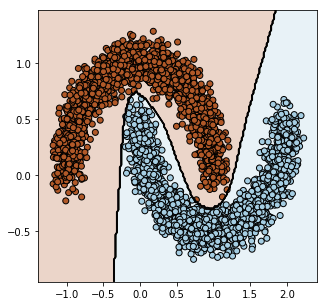

In [14]:
evolution()

plt=plot_decision_boundary(gs_clf_mlp_b, X, y)
plt.savefig('HM_MLP_DB1.png')

# 2. Dataset 2 ( Noise=0.1 and spacing=0.8)

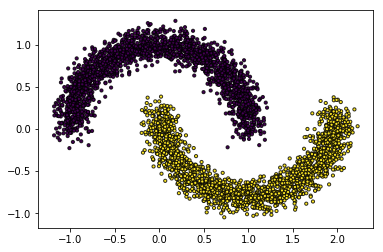

In [15]:
X, y = make_moons1(n_samples=int(n), noise=float(noise),random_state=0,spacing=0.8)
plt.scatter(X[:,0],X[:,1],c=y,s=10,alpha=50,edgecolor='black')
plt.savefig('HM_data2.png')

# 2.1 spliting test and train data

In [16]:
x_test=[]
x_test=X[(X[:,1]>=-0.25) & (X[:,1]<=0.4)]


temp=((X[:,1]>=-0.25) & (X[:,1]<=0.4))

y_test=y[np.where(temp==True)]


# taking 10% data from the region

x_test=x_test[:int(int(n)*.1)]
y_test=y_test[:int(int(n)*.1)]



# taking rest 10% data randomly from the dataset
while(len(x_test)<int(int(n)*.2)):
    p=X[np.random.choice(X.shape[0], 1, replace=False), :]
    m=np.where(X==p)
    if(p not in x_test):
        x_test=np.append(x_test,p,axis=0)
        y_test=np.append(y_test,y[int(m[0][0])])
    else:
        continue

x_train=[]
y_train=[]
for i in X:
    if(i not in x_test):
        x_train.append(i)
        y_train.append(y[np.where(X==i)[0][0]])

x_train=np.array(x_train)
y_train=np.array(y_train)

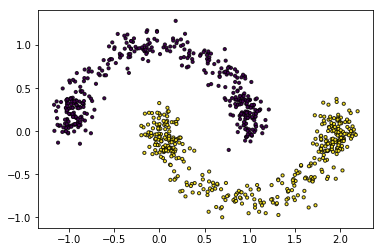

In [17]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=10,alpha=50,edgecolor='black')
plt.savefig('HM_test_data2.png')

# 2.2 Train training dataset using Support vector machine

In [18]:
list_C = np.arange(1,10,1)
clf = svm.SVC(gamma='auto')
parameters = {
            'C':list_C,
            'kernel':['rbf','poly','sigmoid'],
            'gamma':['auto','scale'],
            'decision_function_shape':['ovo', 'ovr']
            }
gs_clf=GridSearchCV(clf,parameters,cv=10)
gs_clf.fit(x_train,y_train)
gs_clf_b=gs_clf.best_estimator_
print (gs_clf.best_estimator_)
predicted = gs_clf_b.predict(x_test)
predicted = list(predicted)
evolution()

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 Confusion Matrix 

[[394   1]
 [  0 405]]
Choose a Scoring technique

 Precision:0.99875

 Recall:0.99875

 F-measure:0.99875


# 2.4 plotting Dicision Boundary(hyperplane)

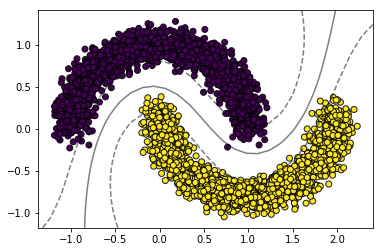

In [19]:
ax = None
    
    
plt.scatter(X[:,0],X[:,1],c=y,alpha=30,edgecolor='black')
if ax is None:
    ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
# create grid to evaluate model
x1 = np.linspace(xlim[0], xlim[1], 30)
y1 = np.linspace(ylim[0], ylim[1], 30)
Y1, X1 = np.meshgrid(y1,x1)
xy = np.vstack([X1.ravel(), Y1.ravel()]).T
P = gs_clf_b.decision_function(xy).reshape(X1.shape)
    
# plot decision boundary and margins
ax.contour(X1, Y1, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
plt.savefig('HM_SVM_DB2.png')

/home/sysadm/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

 Confusion Matrix 

[[395   0]
 [  0 405]]
Choose a Scoring technique

 Precision:1.0

 Recall:1.0

 F-measure:1.0


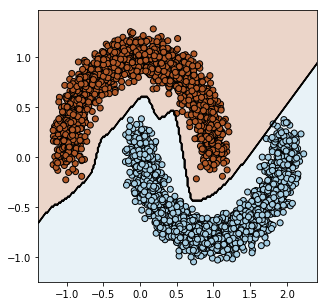

In [20]:
clf_mlp = MLPClassifier()
parameters = {
            'hidden_layer_sizes':[(20),(15,20),(10,10,10)],
            'activation':['tanh','relu','identity','logistic'],
            'max_iter':[1000,2000],
            'solver':['lbfgs', 'sgd', 'adam'],
            
            }
gs_clf_mlp=GridSearchCV(clf_mlp,parameters,cv=10)
gs_clf_mlp.fit(x_train,y_train)
gs_clf_mlp_b=gs_clf_mlp.best_estimator_
print (gs_clf_mlp_b)
predicted = gs_clf_mlp_b.predict(x_test)
predicted = list(predicted)
evolution()
plt=plot_decision_boundary(gs_clf_mlp_b, X, y)
plt.savefig('HM_MLP_DB2.png')

# 3. Dataset 3 ( Noise=0.2 and spacing=1.5)

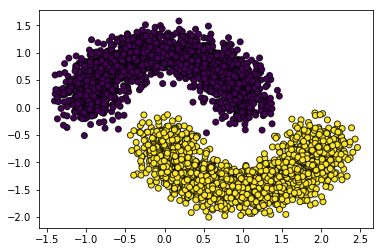

In [21]:
X, y = make_moons1(n_samples=int(n), noise=0.2,random_state=0,spacing=1.5)
plt.scatter(X[:,0],X[:,1],c=y,alpha=50,edgecolor='black')
plt.savefig('HM_data3.png')

# 3.1 spliting the data into test and training set

In [22]:
x_test=[]
x_test=X[(X[:,1]>=-1.0) & (X[:,1]<=0.4)]


temp=((X[:,1]>=-1.0) & (X[:,1]<=.4))

y_test=y[np.where(temp==True)]


# taking 10% data from the region

x_test=x_test[:int(int(n)*.1)]
y_test=y_test[:int(int(n)*.1)]



# taking rest 10% data randomly from the dataset
while(len(x_test)<int(int(n)*.2)):
    p=X[np.random.choice(X.shape[0], 1, replace=False), :]
    m=np.where(X==p)
    if(p not in x_test):
        x_test=np.append(x_test,p,axis=0)
        y_test=np.append(y_test,y[int(m[0][0])])
    else:
        continue

x_train=[]
y_train=[]
for i in X:
    if(i not in x_test):
        x_train.append(i)
        y_train.append(y[np.where(X==i)[0][0]])

x_train=np.array(x_train)
y_train=np.array(y_train)

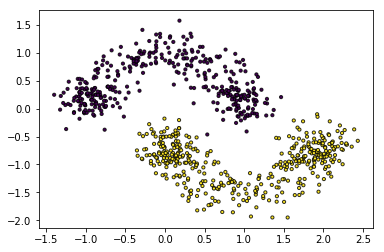

In [23]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=10,alpha=50,edgecolor='black')
plt.savefig('HM_test_data3.png')

# 3.2 train training data using support vector Machine 

In [24]:
list_C = np.arange(1,10,1)
clf = svm.SVC()
parameters = {
            'C':list_C,
            'kernel':['rbf','poly','sigmoid'],
            'gamma':['auto','scale'],
            'decision_function_shape':['ovo', 'ovr']
            }
gs_clf=GridSearchCV(clf,parameters,cv=10)
gs_clf.fit(x_train,y_train)
gs_clf_b=gs_clf.best_estimator_
print (gs_clf.best_estimator_)
predicted = gs_clf_b.predict(x_test)
predicted = list(predicted)
    
evolution()

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 Confusion Matrix 

[[380   1]
 [  0 419]]
Choose a Scoring technique

 Precision:0.99875

 Recall:0.99875

 F-measure:0.99875


# 3.3 plotting dicision boundary(hyperplane)

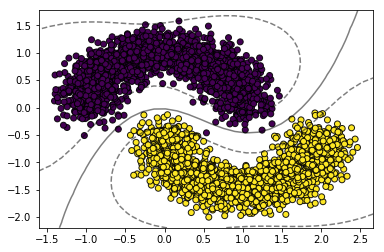

In [25]:
 ax = None
    
    
plt.scatter(X[:,0],X[:,1],c=y,alpha=30,edgecolor='black')
if ax is None:
    ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
# create grid to evaluate model
x1 = np.linspace(xlim[0], xlim[1], 30)
y1 = np.linspace(ylim[0], ylim[1], 30)
Y1, X1 = np.meshgrid(y1,x1)
xy = np.vstack([X1.ravel(), Y1.ravel()]).T
P = gs_clf_b.decision_function(xy).reshape(X1.shape)
    
# plot decision boundary and margins
ax.contour(X1, Y1, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
plt.savefig('HM_SVM_DB3.png')

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

 Confusion Matrix 

[[381   0]
 [  0 419]]
Choose a Scoring technique

 Precision:1.0

 Recall:1.0

 F-measure:1.0


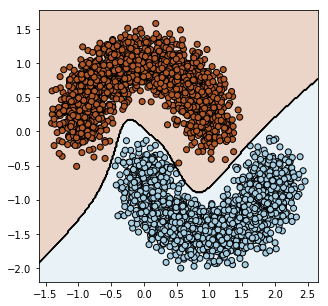

In [26]:
clf_mlp = MLPClassifier()
parameters = {
            'hidden_layer_sizes':[(20),(15,20),(15,15,15)],
            'activation':['tanh','relu','identity','logistic'],
            'max_iter':[1000,2000],
            'solver':['lbfgs', 'sgd', 'adam'],

            }
gs_clf_mlp=GridSearchCV(clf_mlp,parameters,cv=10)
gs_clf_mlp.fit(x_train,y_train)
gs_clf_mlp_b=gs_clf_mlp.best_estimator_
print (gs_clf_mlp_b)
predicted = gs_clf_mlp_b.predict(x_test)
predicted = list(predicted)
evolution()
plt=plot_decision_boundary(gs_clf_mlp_b, X, y)
plt.savefig('HM_MLP_DB3.png')